Here are **all the Decision Tree–related ML questions** copied **word-for-word** from your uploaded PDF:

---

### **Problem Statement No. 1**

**ML**
**Classification: Decision Tree**
**Dataset:** madfhantr.csv

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas.
Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amount so that they can specifically target these customers.

---

### **Problem Statement No. 21**

**ML**
**Classification: Decision Tree**
**Dataset:** pima-indians-diabetes.csv

Create & evaluate the decision tree.
Test the decision tree for any random sample.

---

Would you like me to give you a **simple Decision Tree code** (one for classification on any CSV dataset like these)?


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('madfhantr.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [11]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 4,random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.7916666666666666

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.32      0.47        28
           1       0.78      0.99      0.87        68

    accuracy                           0.79        96
   macro avg       0.84      0.65      0.67        96
weighted avg       0.81      0.79      0.75        96



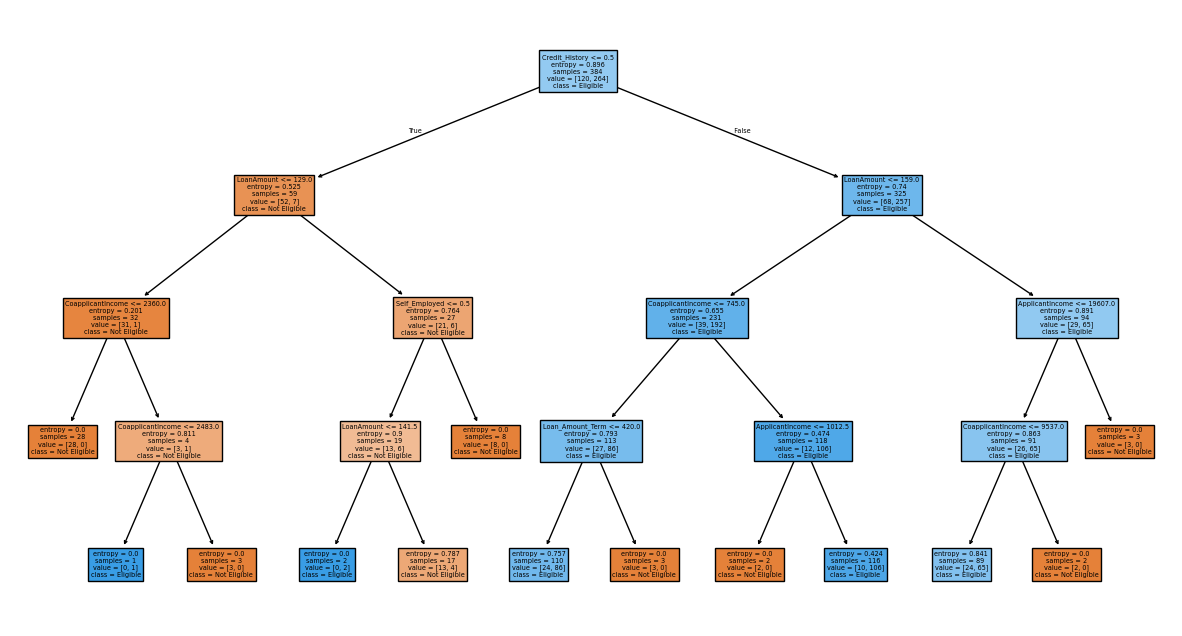

In [16]:
plt.figure(figsize=(15,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Eligible', 'Eligible'])
plt.show()